Thuật toán tìm kiếm theo chiều rộng - Breath first search(BFS)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

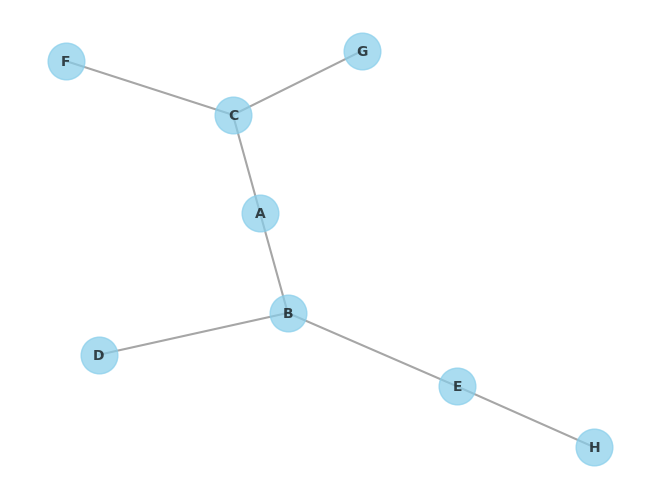

| Level | Node  | Frontier                  | Reached                   |
| 0     | A     |                           | A                         |
+-------+-------+-------------------------+-------------------------+
| 1     | B     | C                         | A, B                      |
+-------+-------+-------------------------+-------------------------+
| 2     | C     | D, E                      | A, B, C                   |
+-------+-------+-------------------------+-------------------------+
| 3     | D     | E, F, G                   | A, B, C, D                |
+-------+-------+-------------------------+-------------------------+
| 4     | E     | F, G                      | A, B, D, E, C             |
+-------+-------+-------------------------+-------------------------+
| 5     | F     | G, H                      | A, B, D, E, C, F          |
+-------+-------+-------------------------+-------------------------+
| 6     | G     | H                         | A, B, D, E, C, G

In [2]:
from collections import deque

def print_table_header():
    print(f"| {'Level':<5} | {'Node':<5} | {'Frontier':<25} | {'Reached':<25} |")

def print_table_row(level, node, frontier, reached):
    print(f"| {level:<5} | {node:<5} | {', '.join(frontier):<25} | {', '.join(reached):<25} |")

def print_separator():
    print("+-------+-------+-------------------------+-------------------------+")


def bfs(graph, start):
    frontier = deque([start])
    reached = set()
    level = 0

    print_table_header()

    while frontier:
        current_node = frontier.popleft()

        if current_node not in reached:
            reached.add(current_node)
            print_table_row(level, current_node, list(frontier), list(reached))

            for neighbor in graph[current_node]:
                if neighbor not in reached and neighbor not in frontier:
                    frontier.append(neighbor)

        if not frontier:# kết thúc
            break  

        # Move to the next level when the frontier is empty
        level += 1
        print_separator()



# Example graph represented as an adjacency list
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F', 'G'],
    'D': ['B'],
    'E': ['B', 'H'],
    'F': ['C'],
    'G': ['C'],
    'H': ['E']
}

#VẼ TRỰC QUAN RA
G = nx.Graph(graph)

pos = nx.spring_layout(G)  # Chọn layout (cách sắp xếp các nút)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1.5, alpha=0.7)
plt.show()

# Start BFS from node 'A'
bfs(graph, 'A')